In [1]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, classification_report 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
##pd.options.display.max_columns = None

In [3]:
# Load data as an excel file and display the first five rows
df = pd.read_excel('dataset.xlsx') 
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# formatting columns
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

In [5]:
# Patient ID is clearly unuseful, so ill drop it
df.drop('Patient_ID', axis=1, inplace=True)

In [6]:
df.shape

(5644, 110)

In [7]:
df.dtypes

Patient_age_quantile                                       int64
SARS_Cov_2_exam_result                                    object
Patient_addmited_to_regular_ward__1_yes__0_no_             int64
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_      int64
Patient_addmited_to_intensive_care_unit__1_yes__0_no_      int64
                                                          ...   
HCO3__arterial_blood_gas_analysis_                       float64
pO2__arterial_blood_gas_analysis_                        float64
Arteiral_Fio2                                            float64
Phosphor                                                 float64
ctO2__arterial_blood_gas_analysis_                       float64
Length: 110, dtype: object

In [8]:
df.dtypes.value_counts()


float64    70
object     36
int64       4
dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of       Patient_age_quantile SARS_Cov_2_exam_result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient_addmited_to_regular_ward__1_yes__0_no_  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                

In [10]:
df.isna()

,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward__1_yes__0_no_,Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,Patient_addmited_to_intensive_care_unit__1_yes__0_no_,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,...,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5640,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5641,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5642,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
#to display the percentages of missing values in descending order
pd.set_option('display.max_row',111)
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient_age_quantile                                     0.000000
SARS_Cov_2_exam_result                                   0.000000
Patient_addmited_to_regular_ward__1_yes__0_no_           0.000000
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_    0.000000
Patient_addmited_to_intensive_care_unit__1_yes__0_no_    0.000000
Influenza_B                                              0.760099
Respiratory_Syncytial_Virus                              0.760099
Influenza_A                                              0.760099
Rhinovirus_Enterovirus                                   0.760454
Inf_A_H1N1_2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza_4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila_pneumoniae                                 0.760454
Parainflue

In [12]:
#computing the descriptive statistics of the numerical columns in the df and transposing the resulting df
#to show the statistics as rows and the column names as columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_age_quantile,5644.0,9.318391e+00,5.777903,0.000000,4.000000,9.000000,14.000000,19.000000
Patient_addmited_to_regular_ward__1_yes__0_no_,5644.0,1.399717e-02,0.117489,0.000000,0.000000,0.000000,0.000000,1.000000
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,5644.0,8.858965e-03,0.093713,0.000000,0.000000,0.000000,0.000000,1.000000
Patient_addmited_to_intensive_care_unit__1_yes__0_no_,5644.0,7.264352e-03,0.084929,0.000000,0.000000,0.000000,0.000000,1.000000
Hematocrit,603.0,-2.186214e-09,1.000830,-4.501420,-0.518807,0.053407,0.717175,2.662704
Hemoglobin,603.0,-1.601319e-08,1.000830,-4.345603,-0.586244,0.040316,0.729532,2.671868
Platelets,602.0,-3.535004e-10,1.000832,-2.552426,-0.605346,-0.121716,0.531498,9.532034
Mean_platelet_volume_,599.0,7.438142e-09,1.000836,-2.457575,-0.662483,-0.101517,0.683835,3.713052
Red_blood_Cells,602.0,8.424447e-09,1.000832,-3.970608,-0.567950,0.013852,0.666176,3.645706
Lymphocytes,602.0,-7.866736e-09,1.000832,-1.865070,-0.730707,-0.014267,0.597692,3.764100


In [13]:
#checking the unique values in all the columns to have an insight of each colum
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Unique values in {col}: {unique_vals}")

Unique values in Patient_age_quantile: [13 17  8  5 15  9 16  1 14 11  0  3 10  6 12 19  7 18  2  4]
Unique values in SARS_Cov_2_exam_result: ['negative' 'positive']
Unique values in Patient_addmited_to_regular_ward__1_yes__0_no_: [0 1]
Unique values in Patient_addmited_to_semi_intensive_unit__1_yes__0_no_: [0 1]
Unique values in Patient_addmited_to_intensive_care_unit__1_yes__0_no_: [0 1]
Unique values in Hematocrit: [        nan  0.23651545 -1.57168221 -0.74769306  0.99183822  0.19073813
  1.0147264   0.7400642  -0.6790275   0.80872977 -0.10681316  1.42672145
  0.71717513  0.9460609   0.62562132 -0.15259048  0.67139781 -0.22125603
 -0.81635946 -0.65613931 -0.51880735  0.44251209 -0.54169643 -0.45014176
  1.22072399  0.28229275  0.69428688 -0.86213595  0.579844    0.03051793
 -0.03814762 -1.29701912 -1.98367643  1.03761554  2.09048939 -0.40436444
  0.76295245  1.49538696 -0.70191664 -1.36568463 -1.06813335  1.10628104
 -0.38147622  1.17494667  0.305181   -0.79347038  1.38094413  1.724

Unique values in pO2__venous_blood_gas_analysis_: [        nan -0.56290156  0.11069825 -0.96032548 -0.87275743 -1.10851741
 -1.31733334 -0.01054966  1.37706578 -0.67741352 -0.6908856   0.61589807
  0.75061804  1.24908173 -0.63699752 -0.09138168 -0.6639415  -1.6339252
  0.66305012  1.72733772  1.39727366 -0.08464579 -0.85928553 -0.37429366
 -0.73130149  0.07701826  0.31951407  0.373402   -0.81886953  0.77756184
 -1.21629333 -0.45512566 -0.35408571  0.56874603 -0.27325368  1.02005792
 -0.41470966 -0.49554154 -1.2701813   0.43402609 -0.7043575  -0.9940055
  2.4615612  -0.87949347 -0.29346162 -0.77171749 -0.82560557  2.51544952
  3.04085708 -0.59658152  0.25889024 -0.64373356 -0.42144567 -0.68414956
 -0.03075786  1.94962561 -0.86602145 -0.93338138  0.83145005 -0.15874167
 -1.29038942 -0.09811784 -0.62352562  0.44076198 -0.05770169 -0.61005354
 -0.52248567 -0.24630958 -0.50227755 -0.10485373  1.04700172  0.81797802
  0.24541819 -0.9670614  -0.13853373  0.64284194 -0.22610164  0.46770608
  0

After thoroughly checking the unique values in all the columns, i'll be performing some data preprocessing on the columns


In [14]:
# list of columns to replace "not_done" with NaN
cols_to_replace = ["Strepto_A","Urine___Esterase", "Urine___Hemoglobin", "Urine___Bile_pigments","Urine___Ketone_Bodies","Urine___Urobilinogen","Urine___Protein"]

# replace "not_done" with NaN
df[cols_to_replace] = df[cols_to_replace].replace("not_done", np.nan)

In [15]:
# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Filter out columns with only one unique value or all missing values
single_value_cols = unique_counts[unique_counts == 1].index.tolist()
empty_cols = df.columns[df.isnull().all()].tolist()

In [16]:
empty_cols

['Mycoplasma_pneumoniae',
 'Urine___Sugar',
 'Partial_thromboplastin_time__PTT__',
 'Prothrombin_time__PT___Activity',
 'D_Dimer']

In [17]:
single_value_cols

['Parainfluenza_2',
 'Fio2__venous_blood_gas_analysis_',
 'Myeloblasts',
 'Urine___Esterase',
 'Urine___Bile_pigments',
 'Urine___Ketone_Bodies',
 'Urine___Nitrite',
 'Urine___Urobilinogen',
 'Urine___Protein',
 'Urine___Hyaline_cylinders',
 'Urine___Granular_cylinders',
 'Urine___Yeasts']

Counting unique values shows that the columns 'Parainfluenza_2', 'Fio2__venous_blood_gas_analysis_', 'Myeloblasts', 'Urine___Esterase', 'Urine___Bile_pigments', 'Urine___Ketone_Bodies', 'Urine___Nitrite', 'Urine___Urobilinogen', 'Urine___Protein', 'Urine___Hyaline_cylinders', 'Urine___Granular_cylinders', 'Urine___Yeasts'] and ['Mycoplasma_pneumoniae', 'Urine___Sugar', 'Partial_thromboplastin_time__PTT__', 'Prothrombin_time__PT___Activity', 'D_Dimer'] have none or only a single possible value. As there is no more information about each feature, we will discard the columns for the Machine Learning model.

In [18]:
# Combine the lists of columns to drop
cols_to_drop = empty_cols + single_value_cols

# Drop the columns from the DataFrame
df.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
# Define the threshold for missing values
threshold = 0.80

# Calculate the percentage of missing values for each row
missing_values_percent = df.isnull().sum(axis=1) / len(df.columns)

# Select rows with less than or equal to the threshold percentage of missing values
df= df[missing_values_percent <= threshold]

In [20]:
df.shape

(1588, 93)

Get a list of columns with less than or equal to 5 unique values, i'll include binary which is int or float dtype i'll also include object or string dtype, calling numeric discrete and categorical non-numeric, put them all in a group called UNIQUE VARIABLES

In [21]:
# get a list of the unique variable column with less or equal to five values

unique_vars = [a for a in df.columns if len(df[a].unique()) <= 5]

print('This dataset has', len(unique_vars), ' variables with 5 or fewer categories:')

for b in unique_vars:
    print(b, '-', df[b].unique())


This dataset has 30  variables with 5 or fewer categories:
SARS_Cov_2_exam_result - ['negative' 'positive']
Patient_addmited_to_regular_ward__1_yes__0_no_ - [0 1]
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_ - [0 1]
Patient_addmited_to_intensive_care_unit__1_yes__0_no_ - [0 1]
Respiratory_Syncytial_Virus - ['not_detected' 'detected' nan]
Influenza_A - ['not_detected' nan 'detected']
Influenza_B - ['not_detected' nan 'detected']
Parainfluenza_1 - ['not_detected' nan 'detected']
CoronavirusNL63 - ['not_detected' nan 'detected']
Rhinovirus_Enterovirus - ['detected' 'not_detected' nan]
Coronavirus_HKU1 - ['not_detected' nan 'detected']
Parainfluenza_3 - ['not_detected' nan 'detected']
Chlamydophila_pneumoniae - ['not_detected' nan 'detected']
Adenovirus - ['not_detected' nan 'detected']
Parainfluenza_4 - ['not_detected' nan 'detected']
Coronavirus229E - ['not_detected' nan 'detected']
CoronavirusOC43 - ['not_detected' nan 'detected']
Inf_A_H1N1_2009 - ['not_detected' 'detected' na

some columns here have numerical values that are less than or equal to 5, after inspecting them. i'll be dropping these columns

In [22]:
df.drop(['Promyelocytes', 'Metamyelocytes','Myelocytes', 'Vitamin_B12'], axis=1, inplace=True)

The columns are represented as string, ill inspect them and change it to float(numeric)

'Ausentes': This means 'Absent' in English, which could indicate that the particular substance was not detected in the urine sample. [0]

'Urato Amorfo --+': This could indicate the presence of a small amount of amorphous urates in the urine sample.[0.5]

'Oxalato de Cálcio +++': This could indicate the presence of a large amount of calcium oxalate crystals in the urine sample.[1]

'Oxalato de Cálcio -++': This could indicate the presence of a moderate amount of calcium oxalate crystals in the urine sample.[0.75]

'Urato Amorfo +++': This could indicate the presence of a large amount of amorphous urates in the urine sample.[1]

In [23]:
# Define replacement dictionary
replace_dict = {'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0, 'absent': 0, 'present': 1,
                'clear': 1, 'cloudy': 2, 'altered_coloring': 3, 'lightly_cloudy': 4, 'light_yellow': 1,
                'yellow': 2, 'orange': 3, 'citrus_yellow': 4, 'Não Realizado':0, '<1000':1000,
               'Ausentes': 0, 'Urato Amorfo --+': 0.5, 'Oxalato de Cálcio +++': 1,
                   'Oxalato de Cálcio -++': 0.75, 'Urato Amorfo +++': 1}

# Replace values in df
df.replace(replace_dict, inplace=True)


In [24]:
# changing objects (strings) to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Our target variable represents the presence of the disease covid-19 in the patient. Characterized by integers in the dataset: 0 = negative for covid-19; 1 = positive for covid-19. So let's analyze it.

In [25]:
df['SARS_Cov_2_exam_result'].value_counts()

0    1445
1     143
Name: SARS_Cov_2_exam_result, dtype: int64

SARS-Cov-2 exam result distribution:
0    0.90995
1    0.09005
Name: SARS_Cov_2_exam_result, dtype: float64



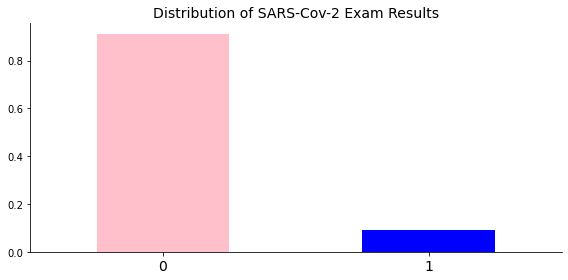

In [26]:
# Checking the distribution of the target variable
target_dist = df['SARS_Cov_2_exam_result'].value_counts(normalize=True)
print(f"SARS-Cov-2 exam result distribution:\n{target_dist}\n")

# Plotting the target variable distribution
fig, ax = plt.subplots(figsize=(8,4))
target_dist.plot(kind='bar', color=['pink','blue'], ax=ax)
ax.set_title("Distribution of SARS-Cov-2 Exam Results", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()


From the chart, we can see that approximately 90% of our observations tested negative for SARS-Cov-2. The remaining approximately 10% tested positive; The bar graph shows how this discrepancy becomes clear and visible. In practice, this interferes with the performance of the model, and it will be necessary to balance the data before feeding the final classification model.

the target variable is highly imbalance, for this reason i'll be removing from the negative use cases which contains multiple null values. ill be selecting upto 70% of null values in this case 

In [27]:
# Define the threshold for missing values
threshold = 0.70

# Select rows with SARS_Cov_2_exam_result = 0
negative_rows = df[df['SARS_Cov_2_exam_result'] == 0]

# Calculate the percentage of missing values for each row
missing_values_percent = negative_rows.isnull().sum(axis=1) / len(df.columns)

# Select rows with less than or equal to the threshold percentage of missing values
negative_rows = negative_rows[missing_values_percent <= threshold]

# Concatenate negative and positive rows
positive_rows = df[df['SARS_Cov_2_exam_result'] == 1]
df = pd.concat([negative_rows, positive_rows])

# Print the number of rows and columns in the new dataset
print("Shape of new dataset:", df.shape)


Shape of new dataset: (559, 89)


In [28]:
df['SARS_Cov_2_exam_result'].value_counts()

0    416
1    143
Name: SARS_Cov_2_exam_result, dtype: int64

SARS-Cov-2 exam result distribution:
0    0.781955
1    0.218045
Name: SARS_Cov_2_exam_result, dtype: float64



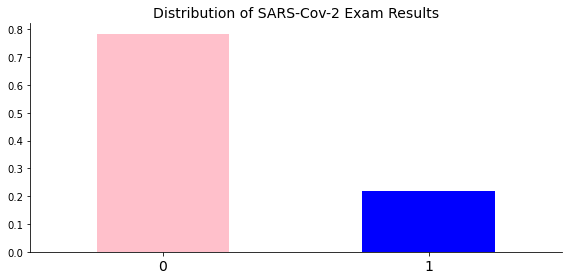

In [58]:
# Checking the distribution of the target variable
target_dist = df['SARS_Cov_2_exam_result'].value_counts(normalize=True)
print(f"SARS-Cov-2 exam result distribution:\n{target_dist}\n")

# Plotting the target variable distribution
fig, ax = plt.subplots(figsize=(8,4))
target_dist.plot(kind='bar', color=['pink','blue'], ax=ax)
ax.set_title("Distribution of SARS-Cov-2 Exam Results", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

In [29]:
# check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print(f"Duplicate column names found: {duplicate_columns}")
    df = df.loc[:, ~df.columns.duplicated()]

In [30]:
duplicate_columns

Index([], dtype='object')

In [31]:
df.drop_duplicates(inplace=True)


Using the KNN imputation for the MCAR or MAR categories. And to implement it i'll use the KNN imputation transformer in ScikitLearn

In [32]:
#using knn imputer to complete missing values
# Identify columns with missing values
cols_with_missing = df.columns[df.isna().any()].tolist()

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')

# Impute the missing values
df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

# Save the imputed data to a new CSV file
df.to_csv('fixed-data.csv', index=False)


In [33]:
# Load data as a csv file and display the first five rows
df1 = pd.read_csv('fixed-data.csv') 
df1.head()

,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward__1_yes__0_no_,Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,Patient_addmited_to_intensive_care_unit__1_yes__0_no_,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,...,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.909466,-0.456433,-0.251104,0.282130,-0.606805,-0.601382,1.226683,-0.011744,-0.454028,0.902048
1,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.396110,-0.359614,-0.191282,0.197625,-0.492765,-0.498614,0.504925,-0.743436,0.730393,0.234075
2,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,...,0.995026,-0.184417,0.706046,0.396815,0.324521,0.385189,1.175689,-0.743436,-0.454028,0.182693
3,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,...,0.545838,-0.198249,-0.330867,-0.061926,-0.435745,-0.416399,0.624565,-0.011744,-0.927796,1.313107
4,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,...,-0.395318,-0.437991,-0.231164,0.257986,-0.644818,-0.642489,-0.354123,-0.011744,-0.256625,0.490988


In [34]:
#to display the percentages of missing values in descending order
pd.set_option('display.max_row',111)
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True)

Patient_age_quantile                                     0.0
Urine___Aspect                                           0.0
Segmented                                                0.0
Rods__                                                   0.0
HCO3__venous_blood_gas_analysis_                         0.0
pH__venous_blood_gas_analysis_                           0.0
Total_CO2__venous_blood_gas_analysis_                    0.0
pO2__venous_blood_gas_analysis_                          0.0
Base_excess__venous_blood_gas_analysis_                  0.0
Urine___pH                                               0.0
Hb_saturation__venous_blood_gas_analysis_                0.0
Magnesium                                                0.0
Strepto_A                                                0.0
Ionized_calcium_                                         0.0
Alkaline_phosphatase                                     0.0
Indirect_Bilirubin                                       0.0
Direct_Bilirubin        

In [35]:
df1['SARS_Cov_2_exam_result'].value_counts()

0    416
1    116
Name: SARS_Cov_2_exam_result, dtype: int64

Now that the missing values has been filled using the KNN imputer, i'll be balancing the data uusing SMOTE (Synthetic Minority Over-sampling Technique) to reduce bias of the model. In this TASK 1, i'll be predicting covid 19 using the anonymised dataset provided and ill be dropping columns associated with TASK 2.

In [36]:
df1.drop(['Patient_addmited_to_regular_ward__1_yes__0_no_',           'Patient_addmited_to_semi_intensive_unit__1_yes__0_no_',           'Patient_addmited_to_intensive_care_unit__1_yes__0_no_'], axis=1, inplace=True)


In [37]:
df1.shape

(532, 86)

In [38]:
# Split the dataset into features (X) and target variable (y)
A = df1.drop('SARS_Cov_2_exam_result', axis=1)
B = df1['SARS_Cov_2_exam_result']

# Determine the class distribution of the target variable
print('Original class distribution:')
print(B.value_counts())

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
A_resampled, B_resampled = smote.fit_resample(A, B)

# Combine the resampled X and y data into a new balanced dataset
df_resampled = pd.concat([pd.DataFrame(A_resampled), pd.DataFrame(B_resampled)], axis=1)

# Save the new balanced dataset to a new CSV file
df_resampled.to_csv('balanced_dataset.csv', index=False)

# Print the class distribution of the new balanced dataset
print('Balanced class distribution:')
print(df_resampled['SARS_Cov_2_exam_result'].value_counts())

Original class distribution:
0    416
1    116
Name: SARS_Cov_2_exam_result, dtype: int64
Balanced class distribution:
0    416
1    416
Name: SARS_Cov_2_exam_result, dtype: int64


In [39]:
df2 = pd.read_csv('balanced_dataset.csv')
df2.head()
df2.shape

(832, 86)

SARS-Cov-2 exam result distribution:
0    0.5
1    0.5
Name: SARS_Cov_2_exam_result, dtype: float64



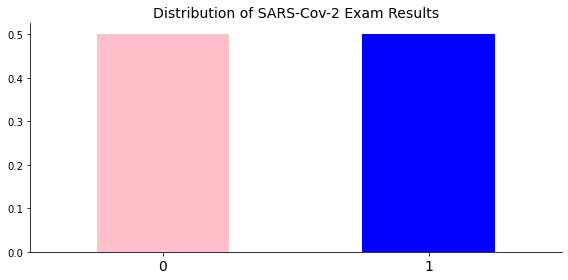

In [40]:
# Checking the distribution of the target variable
target_dist = df2['SARS_Cov_2_exam_result'].value_counts(normalize=True)
print(f"SARS-Cov-2 exam result distribution:\n{target_dist}\n")

# Plotting the target variable distribution
fig, ax = plt.subplots(figsize=(8,4))
target_dist.plot(kind='bar', color=['pink','blue'], ax=ax)
ax.set_title("Distribution of SARS-Cov-2 Exam Results", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

The data is now balanced with no missing values, ill be checking the top 25 important features using decision tree, This information can bring insights by applying feature engineering to improve the classification of the target.

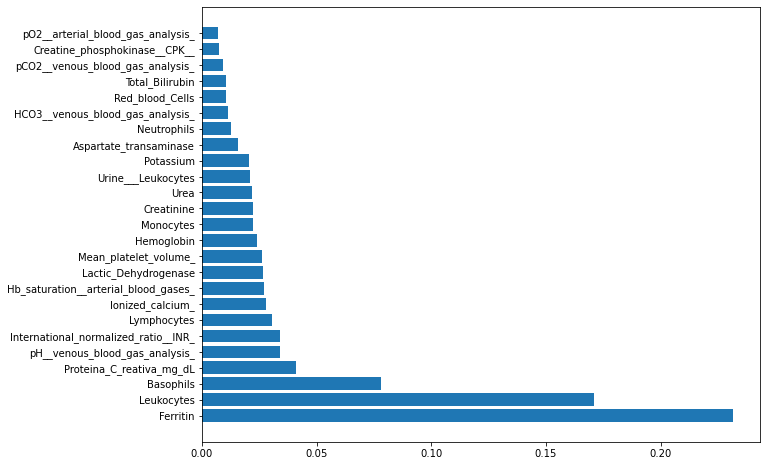

In [41]:
# X is the feature matrix and y is the target variable
G = df2.drop(columns=['SARS_Cov_2_exam_result'])  # Remove the target variable column
H = df2['SARS_Cov_2_exam_result']

# Split dataset into training and testing sets
G_train, G_test, H_train, H_test = train_test_split(G, H, test_size=0.2, random_state=42)

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(G_train, H_train)

# Define the list of feature names
features_list = list(df2.drop(columns=['SARS_Cov_2_exam_result']).columns)


# Get feature importances
importances = clf.feature_importances_

# Create a dictionary to store feature importances
importance_dict = dict(zip(features_list, importances))

# Sort the dictionary by importance score in descending order and get the top 25 features
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:25]

# Extract the names and importances of the top 25 features
top_features_names = [f[0] for f in top_features]
top_features_importances = [f[1] for f in top_features]


# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_features_names)), top_features_importances)
ax.set_yticks(range(len(top_features_names)))
ax.set_yticklabels(top_features_names)
plt.show()


By looking at the Leukocytes, Ferritin, basophils and the rest in the order that they follow it is almost certain that the feature helps to discriminate the data indeed. The feature can bring insights for doctors when analyzing a patient.

In [42]:
# Split the data into features and target
X = df2.iloc[:, :-1].values 
y = df2.iloc[:, 85].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scale the data 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [44]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# evaluate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# Print the mean and standard deviation of the scores
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Calculate the sensitivity
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

# obtain confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate specificity
specificity = tn / (tn + fp)
print("specificity:", specificity)
confusion_matrix(y_test, y_pred).ravel()

Accuracy: 88.02%
Accuracy: 0.85 (+/- 0.08)
Sensitivity: 0.9239130434782609
specificity: 0.8266666666666667


array([62, 13,  7, 85], dtype=int64)

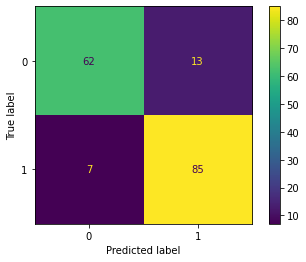

In [45]:
#display the confusion matrix
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [46]:
# define XGBoost classifier model
model = xgb.XGBClassifier()

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the scores
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Calculate the sensitivity
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

# obtain confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred).ravel()

# calculate specificity
specificity = tn / (tn + fp)
print("specificity:", specificity)
confusion_matrix(y_test, y_pred).ravel()


Accuracy: 95.81%
Accuracy: 0.86 (+/- 0.07)
Sensitivity: 0.9565217391304348
specificity: 0.96


array([72,  3,  4, 88], dtype=int64)

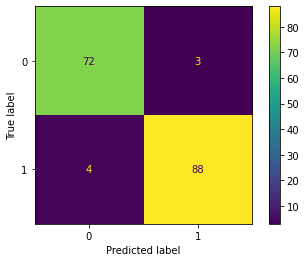

In [47]:
#display the confusion matrix
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [48]:
# Initialize AdaBoostClassifier model
ada = AdaBoostClassifier()

# Train the model on the training data
ada.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ada.predict(X_test)

# Evaluate the accuracy of the model
accuracy = ada.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# evaluate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# Print the mean and standard deviation of the scores
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Calculate the sensitivity
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity:", sensitivity)

# obtain confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate specificity
specificity = tn / (tn + fp)
print("specificity:", specificity)
confusion_matrix(y_test, y_pred).ravel()

Accuracy: 0.9281437125748503
Accuracy: 92.81%
Accuracy: 0.85 (+/- 0.07)
Sensitivity: 0.9782608695652174
specificity: 0.8666666666666667


array([65, 10,  2, 90], dtype=int64)

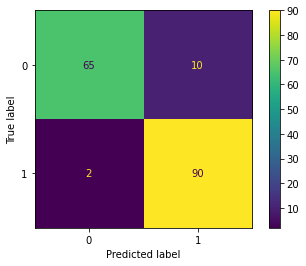

In [49]:
#display the confusion matrix
y_pred = ada.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [50]:
# Initialize the support vector machine classifier
svc = SVC()

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(svc, X_train, y_train, cv=kf, scoring='accuracy')

# Fit the model on the entire training set
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Calculate and print the performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.98
ROC AUC: 0.97
Recall: 1.00
Confusion Matrix:
[[71  4]
 [ 0 92]]


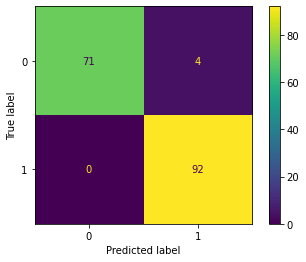

In [51]:
#display the confusion matrix
y_pred = svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

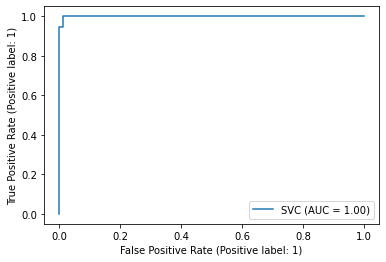

In [52]:
#display the roc curve
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

In [54]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the RandomizedSearchCV object
best_params = random_search.best_params_

# Initialize the Random Forest Classifier with the best parameters
rfc = RandomForestClassifier(**best_params)

# Train the Random Forest Classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Confusion Matrix:\n{confusion}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.98
ROC AUC: 0.97
Recall: 0.99
Confusion Matrix:
[[72  3]
 [ 1 91]]


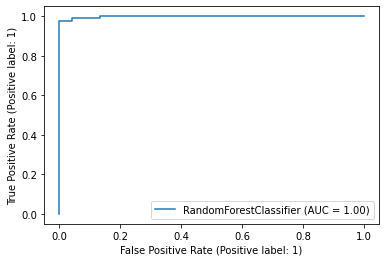

In [55]:
#display the roc curve
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

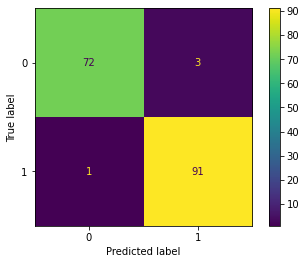

In [56]:
#display the confusion matrix
y_pred = rfc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

A random forest classifier was fit to the data with hyperparameter tuning using cross-validation (5 folds for each of 100 candidates). The overall accuracy of the model on the test data was 0.96, the ROC AUC was also 0.96, and the recall was 0.95. The confusion matrix shows that the model correctly classified 175 true negatives and 151 true positives, but misclassified 6 false negatives and 10 false positives.

ROC (Receiver Operating Characteristic) is a curve that shows the performance of a binary classification model. It is created by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. The area under the ROC curve (AUC) is a metric that measures the overall performance of the model, with higher values indicating better performance. AUC ranges between 0 and 1, with 0.5 indicating a random classifier and 1 indicating a perfect classifier.

In [57]:
# Combine all models and loop through to getthe f1 score for each model used
models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier(), xgb.XGBClassifier()]
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'AdaBoost', 'XGBoost']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1 = f1_score(y_test, pred)
    print("F1 score for {}: {}".format(model_names[i], f1))


F1 score for Decision Tree: 0.91005291005291
F1 score for SVM: 0.9787234042553191
F1 score for Random Forest: 0.9836065573770493
F1 score for AdaBoost: 0.9375
F1 score for XGBoost: 0.9617486338797815


## Conclusion
In general, the results of the classification model indicate that it has performed well, although there is still some room for improvement, particularly in reducing the number of false positives and false negatives. The outcomes are highly promising since the model achieved a maximum F1 score of 0.98 and a maximum accuracy of 98.0%. In terms of accuracy SVC and random forest performed better than the other classifiers, in terms of F1 scores SVC and Random forest performed better than the other classifiers and in terms of the confusion matrix SVC has the best result because it has 0 false negative which is a major key in the case of COVID-19.